**Import required libraries**

In [52]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.naive_bayes import GaussianNB


**Read train and test csv data. Combine them to perform operations such as drop column, fill na values etc.**


In [53]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

head() displays first 5 row details of data.

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check types of data**

In [55]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**info() displays summary of data**

In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Statistical details about data**

In [57]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Analyze by pivoting features**

The higher the number means more correlation with the target

In [58]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)
print(train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)
print(train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))
print('_'*20)
print(train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
____________________
      Sex  Survived
0  female  0.742038
1    male  0.188908
____________________
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
____________________
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


##**Analyze by visualizing data**

###1. Correlating numerical feature between "AGE" and Survived

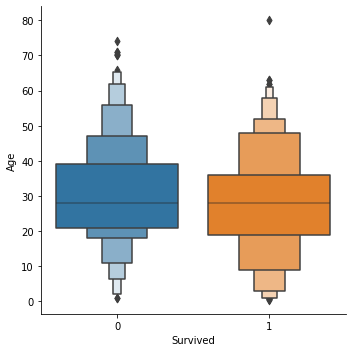

In [59]:
sns.catplot(x="Survived",y="Age",data=train_df, kind="boxen")

###2. Correlating numerical feature between "Pclass" and "Survived"

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

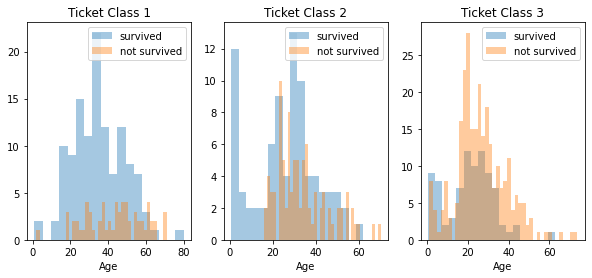

In [60]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))

#women = train_df[train_df['Sex']=='female']
#men = train_df[train_df['Sex']=='male']
pClass_1 = train_df[train_df['Pclass']==1]
pClass_2 = train_df[train_df['Pclass']==2]
pClass_3 = train_df[train_df['Pclass']==3]

ax = sns.distplot(pClass_1[pClass_1['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(pClass_1[pClass_1['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title("Ticket Class 1")

ax = sns.distplot(pClass_2[pClass_2['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(pClass_2[pClass_2['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_= ax.set_title("Ticket Class 2")

ax = sns.distplot(pClass_3[pClass_3['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[2], kde = False)
ax = sns.distplot(pClass_3[pClass_3['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[2], kde = False)
ax.legend()
_= ax.set_title("Ticket Class 3")

##**3. Correlate feature between "Parch" and "Survived"**

####Parch is number of parents and children

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


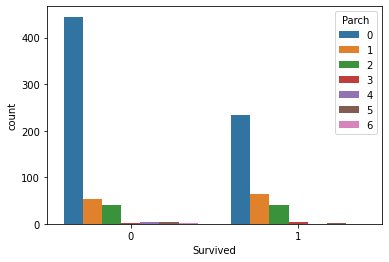

In [61]:
sns.countplot(train_df["Survived"], hue=train_df["Parch"])

**4. Correlate feature between Embarked classes and Surviced**

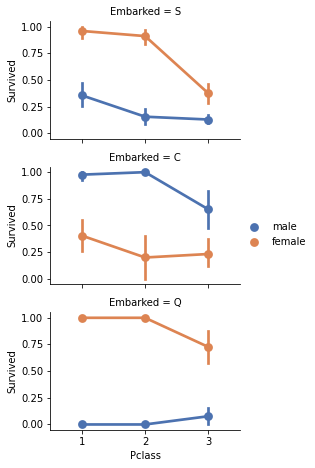

In [62]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep',order=[1, 2, 3], hue_order=None)
grid.add_legend()

##**Preprocess Data**

**Correcting by dropping features**

In [63]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)

In [64]:
print(train_df)

     PassengerId  Survived  Pclass  ...   Age     Fare  Embarked
0              1         0       3  ...  22.0   7.2500         S
1              2         1       1  ...  38.0  71.2833         C
2              3         1       3  ...  26.0   7.9250         S
3              4         1       1  ...  35.0  53.1000         S
4              5         0       3  ...  35.0   8.0500         S
..           ...       ...     ...  ...   ...      ...       ...
886          887         0       2  ...  27.0  13.0000         S
887          888         1       1  ...  19.0  30.0000         S
888          889         0       3  ...   NaN  23.4500         S
889          890         1       1  ...  26.0  30.0000         C
890          891         0       3  ...  32.0   7.7500         Q

[891 rows x 8 columns]


**Creating new feature extracting from existing**

In [65]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
print(dataset['Title'])



0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object


**Creating new feature extracting from existing**

In [66]:
for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')



**We can convert the categorical titles to ordinal**

In [67]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

**Drop the Name feature from training and testing datasets. We also do not need the PassengerId**

In [68]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

**Converting a categorical feature**

In [69]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

**Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.**

In [70]:
train_df['Embarked'].describe()
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [71]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [72]:
meanAge = int(train_df.Age.dropna().mean())

**Converting categorical feature to numeric**

In [73]:
for dataset in combine:
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())


**Find the correlation between "survived" (target column) and "sex" column**

1. combine[0] details are stored in train_preprocess variable. combine[1] details are stored in test_preprocess variable.

2. **As we can see we got correlation between "Survive" and "Sex" are correlated by 0.54 which is considered as significant correlation. Hence, we can include this feature.**

In [74]:
train_preprocess = combine[0]
test_preprocess = combine[1]
# Find the correlation between ‘survived’ (target column) and ‘sex’ column
print(train_preprocess['Survived'].corr(train_preprocess['Sex']))

0.5433513806577555


##**3. Implementation of Naïve Bayes method**

1. Implement Naive Bayes model by importing GaussianNB from scikit learn. Divide X_train and y_train based on "Survived" target column. All independent variables are stored in X_train variable and dependent variables are stored in y_trian variable.

2. Fit the model using parameters X_train and y_train.

4. Predict model accuracy using train results.

5. We got train accuracy of 77.67%


In [75]:
X_train = train_preprocess.drop('Survived', axis=1)
y_train = train_preprocess['Survived'].values
X_test = test_preprocess.drop("PassengerId",axis=1).copy()


In [76]:
# Fit Naive Bayes and predict train accuracy
model = GaussianNB()

model.fit(X_train, y_train)

acc_NB= round(model.score(X_train, y_train) * 100, 2)
print(acc_NB)



77.67
